In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

from pmdarima import auto_arima

In [2]:
# DateTime Column is taken as Index and it's True that it's Series of Dates
df = pd.read_csv('DataSet/Hyderabad_Power_Train.csv', index_col = 'DateTime', parse_dates = True)

In [3]:
df.head(10)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
2017-01-01 01:10:00,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
2017-01-01 01:20:00,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217


In [4]:
# Three Models can be Developed
# Generating DataSet for each Model based on Zones
Z1 = df['Zone 1 Power Consumption']
df.drop('Zone 1 Power Consumption', inplace = True, axis = 1)
Z2 = df['Zone 2  Power Consumption']
df.drop('Zone 2  Power Consumption', inplace = True, axis = 1)
Z3 = df['Zone 3  Power Consumption']
df.drop('Zone 3  Power Consumption', inplace = True, axis = 1)
# df remains as Training Data (X) with 5 Features

In [5]:
# Filling the NaN values with Average of the respective surrounding hour
# Checking for 3 Non-NaN values in left and 3 Non-NaN values in right
# for i in range(1, df.shape[1]) :
#     for j in range(df.shape[0]) :
#         if math.isnan(df.iloc[j, i]) and (j < 47593) and (j > 2) :
#             Q = np.array([])
#             E = 1
#             while 2 > 1 :
#                 if not(math.isnan(df.iloc[j - E, i])) and len(Q) <= 2:
#                     Q = np.append(Q, df.iloc[j - E, i])
#                     E = E + 1
#                 elif len(Q) == 3 :
#                     break
#             E = 1
#             while 2 > 1 :
#                 if not(math.isnan(df.iloc[j + E, i])) and len(Q) <= 5:
#                     Q = np.append(Q, df.iloc[j + E, i])
#                     E = E + 1
#                 elif len(Q) == 6 :
#                     break
#             df.iloc[j, i] = np.mean(Q)
# Filling NaN with the Average of the respective column
for i in range(1, df.shape[1]) :
    df.iloc[:, i] = df.iloc[:, i].fillna(np.mean(df.iloc[:, i]))

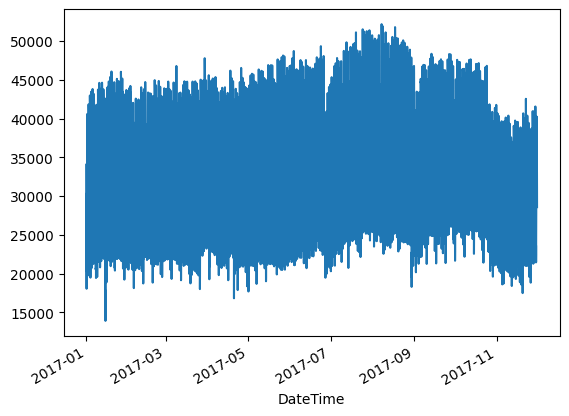

In [6]:
# Visualizing the Zonal Power Consumption
Z1.plot()
plt.show()
# Z1 seems to be stationary (Constant Mean)

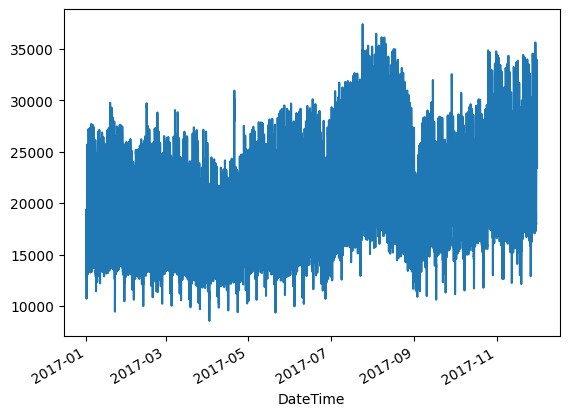

In [7]:
Z2.plot()
plt.show()
# Z2 seems to be stationary (Constant Mean)

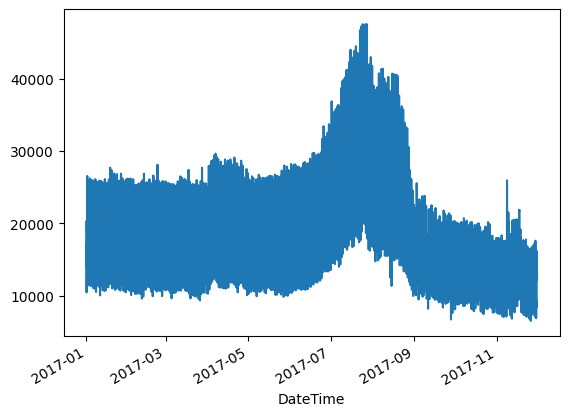

In [8]:
Z3.plot()
plt.show()
# Z3 doesn't seem to be stationary

In [9]:
# Checking for the Stationary
def stationary(df) :
    output = adfuller(df, autolag = 'AIC')
    print(f'ADF : {output[0]}')
    print(f'P-Value : {output[1]}')
    print(f'# Lags : {output[2]}')
    print(f'# Observations : {output[3]}\n')
    # print(f'Critical Values : {}')

In [10]:
print('ZONE 1')
stationary(Z1)
print('ZONE 2')
stationary(Z2)
print('ZONE 3')
stationary(Z3)
# P-Value is Looked for...Such that lesser P-Value indicates that it's stationary

ZONE 1
ADF : -33.42207029565292
P-Value : 0.0
# Lags : 53
# Observations : 47542

ZONE 2
ADF : -23.901618013056893
P-Value : 0.0
# Lags : 57
# Observations : 47538

ZONE 3
ADF : -16.832411026570576
P-Value : 1.1551716572143609e-29
# Lags : 57
# Observations : 47538



In [11]:
# Automatically Check for the best P, D and Q values
fit1 = auto_arima(Z1, trace = True)
# fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=720245.669, Time=7.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=751403.883, Time=0.87 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=721492.008, Time=2.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731971.055, Time=9.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=751401.884, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=720243.806, Time=6.79 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=726737.830, Time=11.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=720717.181, Time=4.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=720245.636, Time=10.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=724329.268, Time=23.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=720321.951, Time=17.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=720246.868, Time=12.95 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=720241.801, Time=2.57 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=726735.831, Time=3.10 sec


In [12]:
fit2 = auto_arima(Z2, trace = True)
# fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=680652.608, Time=17.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=708989.570, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=682394.668, Time=1.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=692522.517, Time=7.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=708987.576, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=680669.681, Time=7.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=680661.106, Time=6.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=680662.997, Time=17.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=680664.984, Time=11.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=680741.280, Time=4.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=680663.154, Time=11.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=680655.469, Time=58.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=680656.437, Time=13.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=680650.603, Time=6.86 sec

In [13]:
fit3 = auto_arima(Z3, trace = True)
# fit3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=678060.938, Time=9.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=716049.951, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=678319.312, Time=2.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=693031.060, Time=8.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=716047.957, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=678048.640, Time=6.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=684986.230, Time=11.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=678061.647, Time=3.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=678026.828, Time=12.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=681614.268, Time=19.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=678021.921, Time=133.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=678023.515, Time=29.93 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=678017.391, Time=11.58 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=678018.025, Time=15.34 s

In [14]:
# Using ARIMA Model for the Time Series Forecasting which is UniVariate | SARIMAX - with exogenous variables
# Auto Regressive Integrated Moving Average
# Train ARIMA(1, 1, 2)
model1 = ARIMA(Z1, order = (1, 1, 2))
model1 = model1.fit()
# model1.summary()
model2 = ARIMA(Z2, order = (2, 1, 2))
model2 = model2.fit()
model3 = ARIMA(Z2, order = (1, 1, 5))
model3 = model3.fit()

/Users/tej/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tej/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tej/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tej/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign

In [15]:
# Sample Submission is read in order to obtain the Index
sample = pd.read_csv('DataSet/sample_submisson.csv', index_col = 'DateTime', parse_dates = True)

In [16]:
final1 = model1.predict(start = len(Z1), end = len(Z1) + 4319, typ = 'levels')
final2 = model2.predict(start = len(Z2), end = len(Z2) + 4319, typ = 'levels')
final3 = model3.predict(start = len(Z3), end = len(Z3) + 4319, typ = 'levels')

/Users/tej/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/tej/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/tej/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
final = pd.DataFrame()
final['Zone 1 Power Consumption'] = final1
final['Zone 2  Power Consumption'] = final2
final['Zone 3  Power Consumption'] = final3
final.index = sample.index

In [18]:
final.head()

,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,
2017-12-01 00:00:00,28068.462116,23039.808951,23040.704372
2017-12-01 00:10:00,27645.205937,22697.841596,22697.048922
2017-12-01 00:20:00,27281.890928,22405.349961,22401.809243
2017-12-01 00:30:00,26970.028273,22153.448400,22148.252551
2017-12-01 00:40:00,26702.331336,21935.689385,21927.799220


In [19]:
final.to_csv('DataSet/Prediction.csv', )